In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path

#torch 
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
# from plotCreator import *

data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

In [3]:
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

# print(bhArray.shape)
# print(sphArray.shape)

In [4]:
#Kombinerer dataene for å kunne kjøre gjennom modellen på et samlet datasett
dataArray = np.concatenate((bhArray,sphArray),axis=0)

# np.shape(dataArray)

In [5]:
# Labeler tabelle med 1 og 0 (0 = svart hull, 1 = spahleron)
labelsArray = np.concatenate((np.zeros(np.shape(bhArray)[0]),np.ones(np.shape(sphArray)[0])),axis=0)

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [7]:
#Split data 75% i train og 25% i test
trainData, testData, trainLabels, testLabels = train_test_split(dataArray, labelsArray, random_state=42)

In [8]:
trainData = torch.from_numpy(trainData).to(device)
testData = torch.from_numpy(testData).to(device)
trainLabels = torch.from_numpy(trainLabels).to(device)
testLabels = torch.from_numpy(testLabels).to(device)

In [9]:
#Transformere numpy til tensor
train = torch.utils.data.TensorDataset(trainData, trainLabels)
test = torch.utils.data.TensorDataset(testData, testLabels)

In [10]:
#Sette data til å vere dataloaders
trainLoader = DataLoader(train, shuffle=True, batch_size=50)
testLoader = DataLoader(test, shuffle=True, batch_size=50)

If you want to improve the model's performance without changing weights or hyperparameters, you can consider the following changes to the architecture of the SymmetricNet:

- Add more convolutional layers: Increasing the depth of the model can help in learning more complex features. Be sure to adjust the size of the input to the first fully connected layer accordingly.

- Increase the number of filters in the convolutional layers: Using more filters in the convolutional layers can help the model to learn more complex features from the input data.

- Add batch normalization layers: Batch normalization can help the model to train faster and achieve better performance. You can add batch normalization layers after each convolutional layer.

In [11]:
# class SymmetricNet(nn.Module):
#     def __init__(self, dropout):
#         super(SymmetricNet, self).__init__()
        
#         self.conv1 = nn.Conv2d(3, 64, 3) #first layer
#         self.bn1 = nn.BatchNorm2d(64)
#         self.pool = nn.AvgPool2d(2, 2)
#         self.dropout1 = nn.Dropout(dropout)
        
#         self.conv2 = nn.Conv2d(64, 128, 4) #second layer
#         self.bn2 = nn.BatchNorm2d(128)
#         self.pool2 = nn.AvgPool2d(2, 2)
#         self.dropout2 = nn.Dropout(dropout)
        
        
        
#         self.fc1 = nn.Linear(128 * 10 * 10, 256)
#         self.dropout3 = nn.Dropout(dropout)
        
#         self.fc2 = nn.Linear(256, 2)

#     def forward(self, x):
#         x_flipped_horizontal = torch.flip(x, [3]) #flip horizontally
#         x_flipped_vertical = torch.flip(x, [2]) #flip vertically
        
#         x = F.relu(self.bn1(self.conv1(x)))
#         x_flipped_horizontal = F.relu(self.bn1(self.conv1(x_flipped_horizontal)))
#         x_flipped_vertical = F.relu(self.bn1(self.conv1(x_flipped_vertical)))
        
#         x = self.pool(x)
#         x_flipped_horizontal = self.pool(x_flipped_horizontal)
#         x_flipped_vertical = self.pool(x_flipped_vertical)
        
#         x = (x + x_flipped_horizontal + x_flipped_vertical) / 3
#         x = self.dropout1(x)
        
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = self.pool2(x)
#         x = self.dropout2(x)
        
#         x = x.reshape(-1, 128 * 10 * 10)
#         x = F.relu(self.fc1(x))
#         x = self.dropout3(x)
        
#         x = self.fc2(x)
#         return x


Here add padding and extra layers to increase accuracy:

Adding padding resolved the issue because when using a kernel size of 5 in the fourth convolutional layer, the calculated output size was smaller than the kernel size which caused the error. By adding padding, the input size of the convolutional layer is increased, resulting in a larger output size that matches the kernel size.

Without padding, the convolutional layer expects the input size to be larger than the kernel size to produce an output size that matches the kernel size. However, with padding, the convolutional layer can produce an output size that matches the kernel size even when the input size is smaller.

Dropout is a regularization technique used in deep learning to prevent overfitting. It is a technique where some of the neurons in a layer are randomly selected and their outputs are ignored or "dropped out" during training. This helps to prevent the network from relying too heavily on any one feature, and encourages it to learn more robust and generalizable representations. Dropout can be implemented in various layers of a neural network, such as fully connected layers or convolutional layers, and it is commonly used in conjunction with other regularization techniques like weight decay and early stopping.

In [12]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torchsummary import summary

# class SymmetricNet(nn.Module):
#     def __init__(self, dropout):
#         super(SymmetricNet, self).__init__()
        
#         self.conv1 = nn.Conv2d(3, 64, 3) #first layer
#         self.bn1 = nn.BatchNorm2d(64)
#         self.pool1 = nn.AvgPool2d(2, 2)
#         self.dropout1 = nn.Dropout(dropout)
        
#         self.conv2 = nn.Conv2d(64, 128, 4) #second layer
#         self.bn2 = nn.BatchNorm2d(128)
#         self.pool2 = nn.AvgPool2d(2, 2)
#         self.dropout2 = nn.Dropout(dropout)
        
#         self.conv3 = nn.Conv2d(128, 256, 3) #third layer
#         self.bn3 = nn.BatchNorm2d(256)
#         self.pool3 = nn.AvgPool2d(2, 2)
#         self.dropout3 = nn.Dropout(dropout)
        
#         self.conv4 = nn.Conv2d(256, 512, 5,padding=2) #fourth layer
#         self.bn4 = nn.BatchNorm2d(512)
#         self.pool4 = nn.AvgPool2d(2, 2)
#         self.dropout4 = nn.Dropout(dropout)
        
#         self.fc1 = nn.Linear(512 * 2 * 2, 256)
#         self.dropout5 = nn.Dropout(dropout)
        
#         self.fc2 = nn.Linear(256, 2)

#     def forward(self, x):
#         x_flipped_horizontal = torch.flip(x, [3]) #flip horizontally
#         x_flipped_vertical = torch.flip(x, [2]) #flip vertically
        
#         x = F.relu(self.bn1(self.conv1(x)))
#         x_flipped_horizontal = F.relu(self.bn1(self.conv1(x_flipped_horizontal)))
#         x_flipped_vertical = F.relu(self.bn1(self.conv1(x_flipped_vertical)))
        
#         x = self.pool1(x)
#         x_flipped_horizontal = self.pool1(x_flipped_horizontal)
#         x_flipped_vertical = self.pool1(x_flipped_vertical)
        
#         x = (x + x_flipped_horizontal + x_flipped_vertical) / 3
#         x = self.dropout1(x)
        
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = self.pool2(x)
#         x = self.dropout2(x)
        
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = self.pool3(x)
#         x = self.dropout3(x)
        
#         x = F.relu(self.bn4(self.conv4(x)))
#         x = self.pool4(x)
#         x = self.dropout4(x)
        
#         x = x.reshape(-1, 512 * 2 * 2)
#         x = F.relu(self.fc1(x))
#         x = self.dropout5(x)
        
#         x = self.fc2(x)
#         return x


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class SymmetricNet(nn.Module):
    def __init__(self, dropout):
        super(SymmetricNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 128, 3) #first layer
        self.bn1 = nn.BatchNorm2d(128)
        self.pool1 = nn.AvgPool2d(2, 2)
        self.dropout1 = nn.Dropout(dropout)
        
        self.conv2 = nn.Conv2d(128, 256, 4) #second layer
        self.bn2 = nn.BatchNorm2d(256)
        self.pool2 = nn.AvgPool2d(2, 2)
        self.dropout2 = nn.Dropout(dropout)
        
        self.conv3 = nn.Conv2d(256, 512, 3) #third layer
        self.bn3 = nn.BatchNorm2d(512)
        self.pool3 = nn.AvgPool2d(2, 2)
        self.dropout3 = nn.Dropout(dropout)
        
        self.conv4 = nn.Conv2d(512, 1024, 5, padding=2) #fourth layer
        self.bn4 = nn.BatchNorm2d(1024)
        self.pool4 = nn.AvgPool2d(2, 2)
        self.dropout4 = nn.Dropout(dropout)
        
        self.fc1 = nn.Linear(1024 * 2 * 2, 256)
        self.dropout5 = nn.Dropout(dropout)
        
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x_flipped_horizontal = torch.flip(x, [3]) #flip horizontally
        x_flipped_vertical = torch.flip(x, [2]) #flip vertically
    
        x = F.relu(self.bn1(self.conv1(x)))
        x_flipped_horizontal = F.relu(self.bn1(self.conv1(x_flipped_horizontal)))
        x_flipped_vertical = F.relu(self.bn1(self.conv1(x_flipped_vertical)))
        
        x = self.pool1(x)
        x_flipped_horizontal = self.pool1(x_flipped_horizontal)
        x_flipped_vertical = self.pool1(x_flipped_vertical)
        
        x = (x + x_flipped_horizontal + x_flipped_vertical) / 3
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = self.dropout3(x)
        
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)
        x = self.dropout4(x)
        
        x = x.reshape(-1, 1024 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.dropout5(x)
        
        x = self.fc2(x)
        return x


In [14]:
from torchsummary import summary

model = SymmetricNet(dropout=0.25).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, input_size=(3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 48, 48]           3,584
       BatchNorm2d-2          [-1, 128, 48, 48]             256
            Conv2d-3          [-1, 128, 48, 48]           3,584
       BatchNorm2d-4          [-1, 128, 48, 48]             256
            Conv2d-5          [-1, 128, 48, 48]           3,584
       BatchNorm2d-6          [-1, 128, 48, 48]             256
         AvgPool2d-7          [-1, 128, 24, 24]               0
         AvgPool2d-8          [-1, 128, 24, 24]               0
         AvgPool2d-9          [-1, 128, 24, 24]               0
          Dropout-10          [-1, 128, 24, 24]               0
           Conv2d-11          [-1, 256, 21, 21]         524,544
      BatchNorm2d-12          [-1, 256, 21, 21]             512
        AvgPool2d-13          [-1, 256, 10, 10]               0
          Dropout-14          [-1, 256,

In [15]:
def train(model, train_loader, test_loader, optimizer, criterion, n_epochs):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Initialize lists to store the metrics
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    #Start epoch
    for epoch in range(n_epochs):
        # Train
        model.train()
        train_loss = 0
        correct = 0
        total = 0
    
        #Train loop
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device, non_blocking=True).float(), labels.to(device, non_blocking=True).long()
            optimizer.zero_grad()
            outputs = model(inputs.permute(0, 3, 1, 2)).float()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        #Train loop end
        

        train_acc = 100 * correct / total
        train_loss /= len(train_loader)

        # Test
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device, non_blocking=True).float(), labels.to(device, non_blocking=True).long()
                outputs = model(inputs.permute(0, 3, 1, 2)).float()
                loss = criterion(outputs, labels)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_acc = 100 * correct / total
        test_loss /= len(test_loader)

        # Print results
        print(f"Epoch {epoch+1}/{n_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

        # Append the metrics to the lists
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

    # Plot the metrics
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.legend()
    plt.title('Training and Testing Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.show()


Epoch 1/15
Train Loss: 0.3498, Train Accuracy: 85.32%
Test Loss: 0.2826, Test Accuracy: 87.73%
Epoch 2/15
Train Loss: 0.2865, Train Accuracy: 88.72%
Test Loss: 0.2609, Test Accuracy: 89.57%
Epoch 3/15
Train Loss: 0.2683, Train Accuracy: 89.41%
Test Loss: 0.2898, Test Accuracy: 89.01%
Epoch 4/15
Train Loss: 0.2599, Train Accuracy: 90.02%
Test Loss: 0.2072, Test Accuracy: 91.57%
Epoch 5/15
Train Loss: 0.2460, Train Accuracy: 90.44%
Test Loss: 0.2018, Test Accuracy: 92.24%
Epoch 6/15
Train Loss: 0.2400, Train Accuracy: 90.88%
Test Loss: 0.2415, Test Accuracy: 89.72%
Epoch 7/15
Train Loss: 0.2371, Train Accuracy: 90.96%
Test Loss: 0.2023, Test Accuracy: 92.29%
Epoch 8/15
Train Loss: 0.2274, Train Accuracy: 91.14%
Test Loss: 0.1974, Test Accuracy: 91.87%
Epoch 9/15
Train Loss: 0.2182, Train Accuracy: 91.58%
Test Loss: 0.2786, Test Accuracy: 87.88%
Epoch 10/15
Train Loss: 0.2230, Train Accuracy: 91.43%
Test Loss: 0.1944, Test Accuracy: 92.49%
Epoch 11/15
Train Loss: 0.2195, Train Accuracy: 9

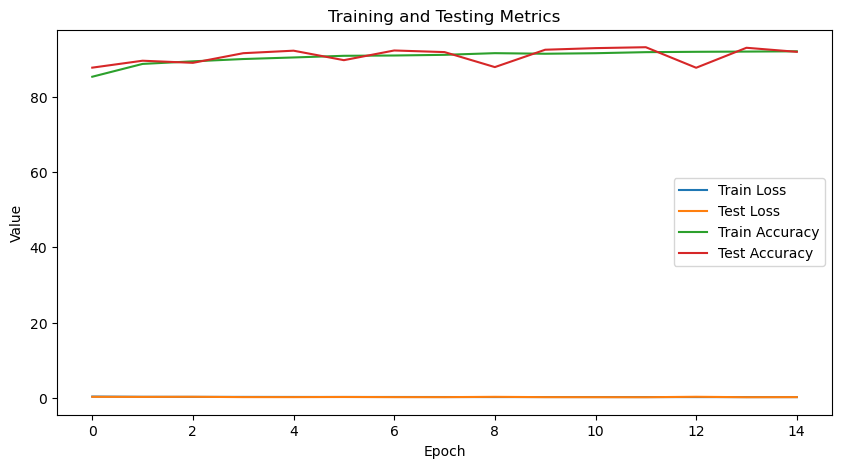

In [16]:
# Set the learning rate and number of epochs
n_epochs = 15

# Create the model
model = SymmetricNet(0.5)
model.float()
model.to(device)

# Set up the optimizer and criterion
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Train the model
train(model, trainLoader, testLoader, optimizer, criterion, n_epochs)

Code below makes it possible to save model

In [17]:
# # Define the file path to save the trained model
# model_path = 'model.pth'

# # Train and save the model
# #train(model, train_loader, test_loader, optimizer, criterion, n_epochs)
# torch.save(model.state_dict(), model_path)

In [18]:
# # Define the file path to load the saved model
# model_path = 'model.pth'

# # Create an instance of the model and load the saved state dictionary
# model = SymmetricNet(dropout=0.25)
# model.load_state_dict(torch.load(model_path))